In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

In [23]:
bal_df = pd.read_csv('budget files/DEP_1101_BAL (1).csv')
tran_df = pd.read_csv('budget files/DEP_1101_TRAN (1).csv')

In [24]:
bal_df.columns
tran_df.columns

Index(['As-Of Date', 'As-Of-Time', 'Bank ID', 'Bank Name', 'State', 'Acct No',
       'Acct Type', 'Acct Name', 'Currency', 'IBAN', 'BAI Type Code',
       'Tran Desc', 'Debit Amt', 'Credit Amt', '0 Day Flt Amt',
       '1 Day Flt Amt', '2+ Day Flt Amt', 'Customer Ref No', 'Value Date',
       'Location', 'Bank Reference', 'Tran Status', 'Descriptive Text 1',
       'Descriptive Text 2', 'Descriptive Text 3', 'Descriptive Text 4',
       'Descriptive Text 5', 'Descriptive Text 6', 'Descriptive Text 7',
       'Descriptive Text 8', 'Descriptive Text 9', 'Descriptive Text 10',
       'Descriptive Text 11', 'Descriptive Text 12', 'Descriptive Text 13',
       'Descriptive Text 14', 'Descriptive Text 15', 'Descriptive Text 16',
       'Descriptive Text 17', 'Descriptive Text 18', 'Descriptive Text 19',
       'Descriptive Text 20', 'Descriptive Text 21', 'Descriptive Text 22',
       'Description', 'Unique ID', 'Discretionary Data', 'UETR',
       'Payment Fee Deduction', 'Beneficiary Fina

In [27]:
small_df = bal_df[["As-Of Date", "Closing Ledger Bal"]]
debit_tran_df = tran_df[["As-Of Date", "Debit Amt"]]
credit_tran_df = tran_df[["As-Of Date", "Credit Amt"]]

In [14]:
mask_bal = small_df["Closing Ledger Bal"] != 0

In [15]:
small_df = small_df[mask_bal]

In [18]:
small_df["Closing Ledger Bal"]

0      293313.66
2      498064.90
4      497441.54
6      497641.61
8      448559.94
         ...    
160    137558.81
162    137558.81
164    138157.30
166    110392.23
168    267457.02
Name: Closing Ledger Bal, Length: 85, dtype: float64

In [21]:
closing_bal = small_df["Closing Ledger Bal"].values[::-1]

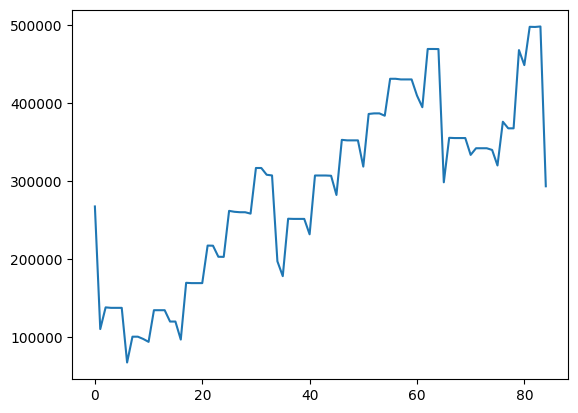

In [22]:
plt.plot(closing_bal)

In [30]:
debit_mask = debit_tran_df["Debit Amt"] != 0

debit_tran_df = debit_tran_df[debit_mask]

In [35]:
debit_tran_df

,As-Of Date,Debit Amt
0,20240515,204751.24
2,20240515,204751.24
4,20240514,100.00
6,20240514,100.00
7,20240513,200.07
...,...,...
149,20240118,415.34
151,20240118,415.34
153,20240117,108.02
154,20240117,23661.77


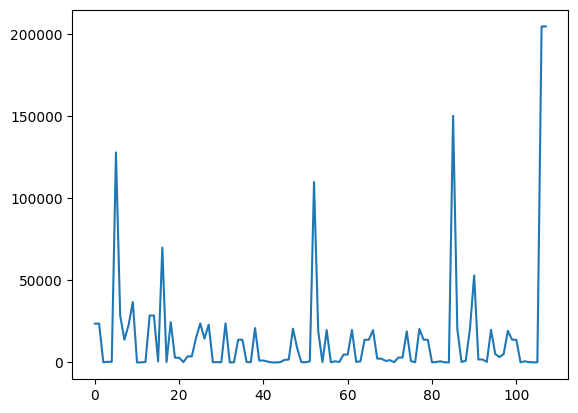

In [34]:
plt.plot(debit_tran_df["Debit Amt"].values[::-1])

In [38]:
credit_mask = credit_tran_df["Credit Amt"] != 0
credit_tran_df = credit_tran_df[credit_mask]

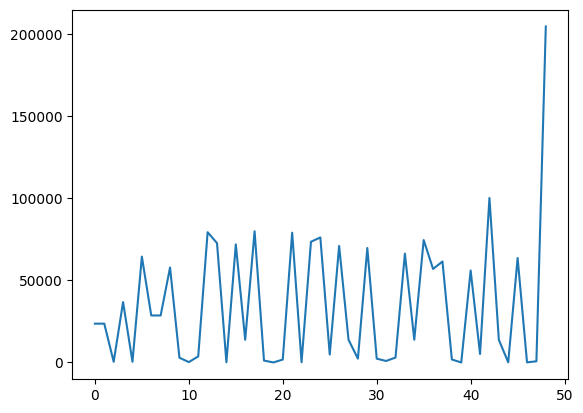

In [40]:
plt.plot(credit_tran_df["Credit Amt"].values[::-1])

# Prophet Testing

In [14]:
monthly_sum['PM']

,SubTotal
Date,
2024-01-31,1.755369e+06
2024-02-29,1.717564e+06
2024-03-31,1.843316e+06
2024-04-30,1.709931e+06
2024-05-31,1.058252e+06


11:39:01 - cmdstanpy - INFO - Chain [1] start processing
11:39:01 - cmdstanpy - INFO - Chain [1] done processing


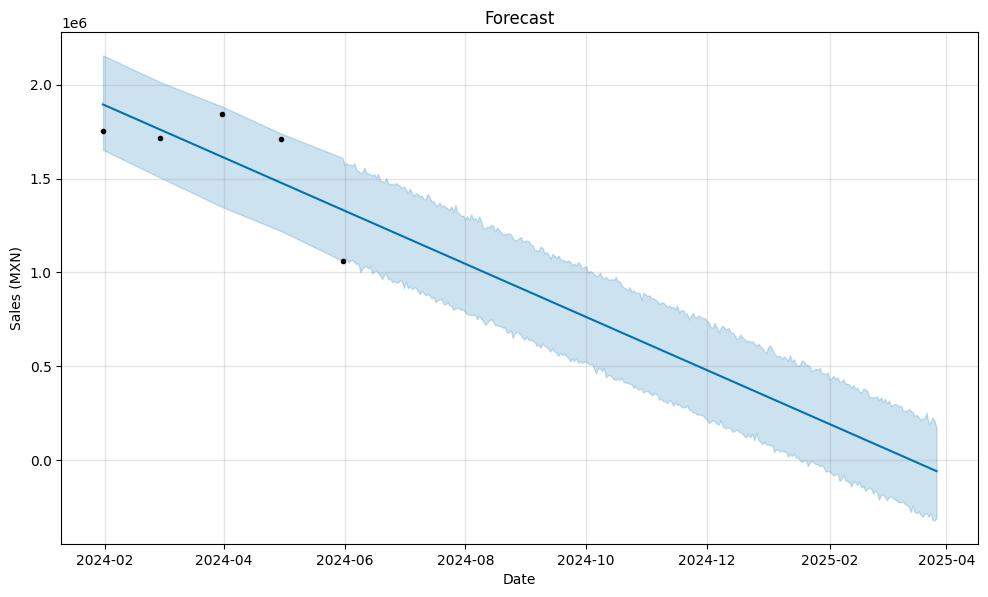

In [31]:
data = monthly_sum['PM']

# Preprocess the data
data['ds'] = pd.to_datetime(data['Date'])
data['y'] = data['SubTotal']

# Create and fit the Prophet model
model = Prophet(seasonality_mode='multiplicative')
model.fit(data)

# Create future dates for prediction
future = model.make_future_dataframe(periods=300, freq='D')

# Add holiday and weather regressors if available
if 'holidays' in data.columns:
    future = model.add_country_holidays(country_name='US', return_df=True)
if 'weather' in data.columns:
    future['weather'] = data['weather']

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Sales (MXN)')
plt.show()

# Weather Data Testing

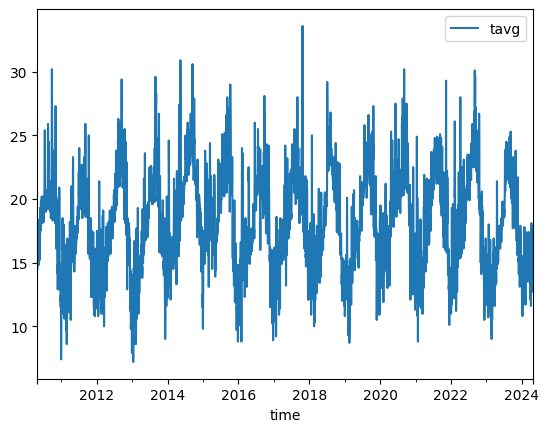

In [21]:
# Import Meteostat library and dependencies
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2010, 4, 30)
end = datetime(2024, 4, 30)

# Create Point for Vancouver, BC
costamesa = Point(33.657217, -117.919124, 90)

# Filter out the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Get daily data for 2018
data = Daily(costamesa, start, end)
data = data.fetch()

# Reset the warning filter
warnings.resetwarnings()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg'])
plt.show()

In [22]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2010-04-30,14.5,9.6,20.2,0.0,NaN,NaN,8.3,NaN,1012.5,NaN
2010-05-01,15.3,11.8,19.6,0.0,NaN,178.0,11.1,NaN,1012.5,NaN
2010-05-02,15.9,12.9,19.0,0.0,NaN,176.0,10.8,NaN,1014.4,NaN
2010-05-03,18.4,12.9,24.0,0.0,NaN,NaN,5.2,NaN,1020.6,NaN
2010-05-04,16.7,12.9,21.8,0.0,NaN,NaN,10.1,NaN,1016.5,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-04-26,15.4,13.2,19.6,0.0,NaN,172.0,11.2,NaN,1013.9,NaN
2024-04-27,16.5,13.5,19.6,0.0,NaN,164.0,11.2,NaN,1014.9,NaN
2024-04-28,16.8,12.6,20.6,0.0,NaN,183.0,8.1,NaN,1015.3,NaN


In [23]:
prac_df = data.dropna(subset=['prcp'], inplace=False)

In [24]:
prac_df.shape

(4920, 10)

In [2]:
df = pd.read_excel('budget files/BD_Venta diaria.xlsx')

In [3]:
# Keep only the columns "SubTotal" and "Date"
new_df = df.loc[:, ["SubTotal", "Date", "Sucursal"]]

# Group the new_df dataframe by the "Sucursal" column
grouped_df = new_df.groupby("Sucursal")

# Create a dictionary to store the new dataframes
dataframes = {}

# Iterate over each unique value of "Sucursal"
for name, group in grouped_df:
    # Create a new dataframe for each unique value of "Sucursal"
    # dataframes[name] = group.copy()
    temp_df = group.copy().drop(columns="Sucursal")
    dataframes[name] = temp_df

In [4]:
dataframes['PM']

,SubTotal,Date
15,135.0,2024-01-01
25,505.0,2024-01-01
34,0.0,2024-01-01
52,0.0,2024-01-01
55,0.0,2024-01-01
...,...,...
135655,0.0,2024-05-21
135657,0.0,2024-05-21
135658,0.0,2024-05-21
135665,0.0,2024-05-21


In [5]:
import pandas as pd

monthly_sum = {}

for name, temp_df in dataframes.items():

    # Assuming your DataFrame is named 'data'
    # Convert the 'Date' column to datetime if it's not already
    temp_df['Date'] = pd.to_datetime(temp_df['Date'])

    # Group the data by month and sum the values
    monthly_sum[name] = temp_df.groupby(pd.Grouper(key='Date', freq='ME')).sum()

    # Filter for the month of May
    # may_sum = monthly_sum[monthly_sum.index.month == 5]

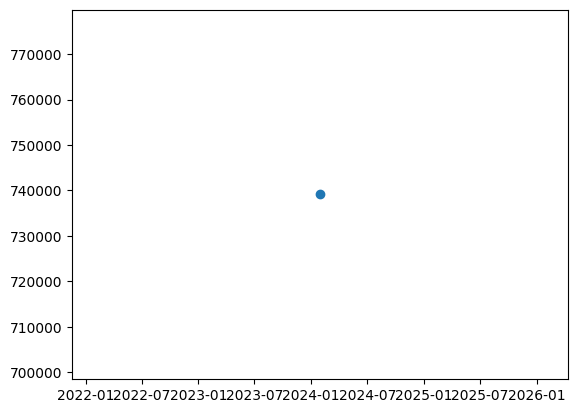

In [6]:
plt.plot(monthly_sum[name].iloc[:-1, :].idxmax(), monthly_sum[name].iloc[:-1, :].max(), 'o')

In [116]:
monthly_sum[name].iloc[:-1, :].idxmax()

SubTotal   2024-01-31
dtype: datetime64[ns]

In [90]:
monthly_sum[name].iloc[:-1, :] / monthly_sum[name].iloc[:-1, :].max()

,SubTotal
Date,
2024-01-31,1.000000
2024-02-29,0.795576
2024-03-31,0.878839
2024-04-30,0.740338


<Axes: xlabel='time'>

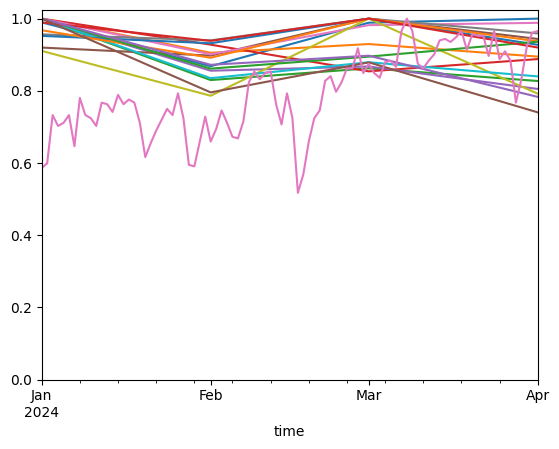

In [11]:
num_plots = len(monthly_sum.keys())
fig, ax = plt.subplots()

for i, name in enumerate(monthly_sum.keys()):
    # plt.subplot(num_plots, 1, i+1)
    # monthly_sum[name].iloc[:-1, :].plot(ylim=(0, None))
    
    if monthly_sum[name].shape[0] == 5:
        (monthly_sum[name].iloc[:-1, :] / monthly_sum[name].iloc[:-1, :].max()).plot(ax=ax, legend=False, ylim=(0, None))
        # ax.plot(monthly_sum[name].iloc[:-1, :].idxmax(), monthly_sum[name].iloc[:-1, :].max(), 'o')
    
(cdmx_tavg_nonans[-121:-29] / cdmx_tavg_nonans[-121:-29].max()).plot(ax=ax, legend=False, ylim=(0, None))
    
# plt.legend()
# plt.show()


### Weather - CDMX

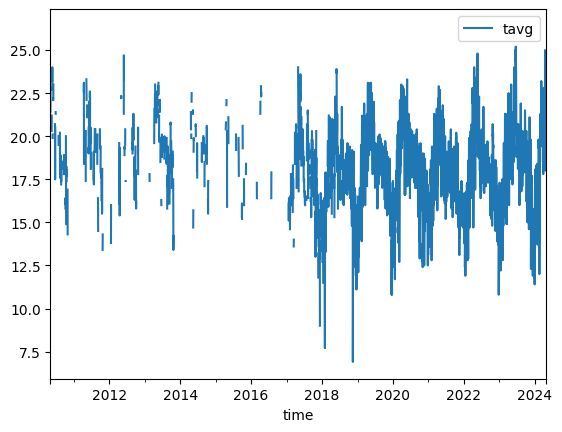

In [8]:
# Import Meteostat library and dependencies
import warnings
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2010, 4, 30)
end = datetime(2024, 4, 30)

# Create Point for coordinates. TODO: Is this in feet or meters?
mexico_city = Point(19.431278, -99.141214, 2240)

# Filter out the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Get daily data for 2018
data_cdmx = Daily(mexico_city, start, end)
data_cdmx = data_cdmx.fetch()

# Reset the warning filter
warnings.resetwarnings()

# Plot line chart including average, minimum and maximum temperature
data_cdmx.plot(y=['tavg'])
plt.show()

In [9]:
cdmx_tavg_nonans = data_cdmx['tavg'].iloc[-2116:]
cdmx_tavg_nonans[-121:-29]

time
2024-01-01    13.6
2024-01-02    13.9
2024-01-03    17.0
2024-01-04    16.3
2024-01-05    16.5
              ... 
2024-03-28    17.8
2024-03-29    19.3
2024-03-30    21.4
2024-03-31    22.3
2024-04-01    22.4
Freq: D, Name: tavg, Length: 92, dtype: float64

### Tourism

In [49]:
import pandas as pd

data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "2021": [1.9, 1.6, 2.3, 2.3, 2.7, 3.1, 3.4, 2.8, 2.5, 2.8, 2.9, 3.7],
    "2022": [2.6, 2.6, 3.3, 3.1, 3.0, 3.4, 3.7, 3.1, 2.8, 3.2, 3.4, None]
}

tourism_df = pd.DataFrame(data)
print(tourism_df)


   Month  2021  2022
0    Jan   1.9   2.6
1    Feb   1.6   2.6
2    Mar   2.3   3.3
3    Apr   2.3   3.1
4    May   2.7   3.0
5    Jun   3.1   3.4
6    Jul   3.4   3.7
7    Aug   2.8   3.1
8    Sep   2.5   2.8
9    Oct   2.8   3.2
10   Nov   2.9   3.4
11   Dec   3.7   NaN


In [31]:
monthly_sum['CEN']

,SubTotal
Date,
2024-01-31,5.623313e+06
2024-02-29,4.811761e+06
2024-03-31,4.877745e+06
2024-04-30,4.527582e+06
2024-05-31,2.716222e+06


<Axes: xlabel='Date'>

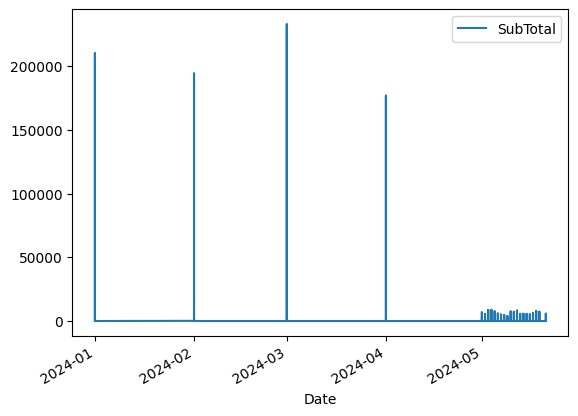

In [37]:
dataframes['PM'].plot(x='Date', y='SubTotal', kind='line')